<a href="https://colab.research.google.com/github/neonworker/bio-image/blob/main/02a_image_processing/03_opening_images_using_aicsimageio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading files with AICSImageIO

The [AICSImageIO library](https://github.com/AllenCellModeling/aicsimageio) aims streamlining reading microscopy image data.

To install the library, you need to call this command.

```
pip install aicsimageio
```

In case specific proprietary file formats should be read, additional software must be installed. [Check the documentation for details](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation).

In [14]:
#Neccessary Google Colab imports
!pip install pyclesperanto_prototype stackview ipycanvas==0.11
!pip install aicsimageio
!pip install aicspylibczi>=3.1.1 fsspec>=2022.8.0


#!pip install bioio bioio-czi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.0/624.0 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 724.6/724.6 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [22]:
from aicsimageio import AICSImage
#from bioio import BioImage
import stackview
import pyclesperanto_prototype as cle

/usr/local/lib/python3.11/dist-packages/pytools/persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


First, we create an `AICSImage` object to see if it understands our file format.

As example we are using here an image shared by Romina Piscitello-Gómez (MPI CBG Dresden).

In [16]:
#download image from github
!wget -q https://github.com/ScaDS/BIDS-lecture-2025/raw/refs/heads/main/02a_image_processing/data/PupalWing.czi
aics_image = AICSImage("/content/PupalWing.czi")
aics_image

#bioio_image = BioImage("/content/PupalWing.czi")
#bioio_image

<AICSImage [Reader: CziReader, Image-is-in-Memory: False]>

This object can already give us basic information such as image size/shape, dimensions and dimension names and order.

In [17]:
#bioio_image.shape
aics_image.shape

(1, 1, 80, 520, 692)

In [18]:
aics_image.dims

<Dimensions [T: 1, C: 1, Z: 80, Y: 520, X: 692]>

In [19]:
aics_image.dims.order

'TCZYX'

From this object, we can also retrieve pixels as numpy arrays.

In [20]:
np_image = aics_image.get_image_data("ZYX", T=0)
np_image.shape

(80, 520, 692)

In [23]:
from google.colab import output
output.enable_custom_widget_manager()
cle.select_device("cupy")

'cupy backend (experimental)'

In [24]:
stackview.insight(np_image)

StackViewNDArray([[[35, 43, 38, ..., 41, 32, 40],
                   [36, 45, 35, ..., 39, 35, 33],
                   [47, 49, 49, ..., 40, 42, 37],
                   ...,
                   [38, 40, 32, ..., 40, 38, 38],
                   [36, 50, 39, ..., 39, 38, 34],
                   [44, 32, 41, ..., 31, 42, 43]],

                  [[37, 35, 44, ..., 34, 34, 32],
                   [36, 42, 45, ..., 33, 39, 35],
                   [34, 36, 37, ..., 29, 46, 37],
                   ...,
                   [39, 41, 41, ..., 36, 33, 45],
                   [36, 38, 41, ..., 41, 33, 30],
                   [32, 42, 44, ..., 36, 36, 31]],

                  [[40, 39, 40, ..., 35, 41, 37],
                   [32, 43, 31, ..., 28, 35, 29],
                   [35, 40, 41, ..., 33, 32, 37],
                   ...,
                   [43, 36, 29, ..., 38, 35, 40],
                   [36, 38, 43, ..., 39, 35, 38],
                   [38, 42, 43, ..., 37, 42, 35]],

                  ...,

In [12]:
stackview.slice(np_image)

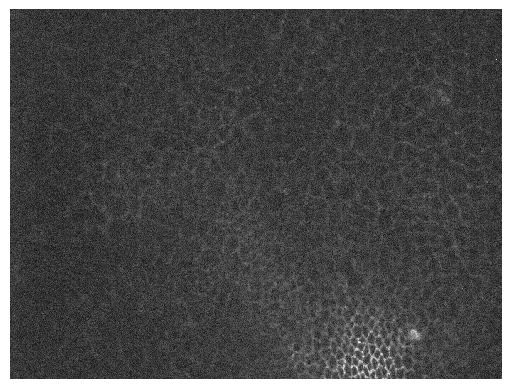

In [11]:
stackview.imshow(np_image[39])

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

## Reading meta data

When working with microscopy image data, it is important to be aware of meta data, for example the voxel size. In order to do volume measurements in proper physical units, we need to know how large a voxel is in X, Y and Z.

In [ ]:
aics_image.physical_pixel_sizes

PhysicalPixelSizes(Z=1.0, Y=0.20476190476190476, X=0.20476190476190476)

And one can define a helper function for reading the voxel size in Z/Y/X format.

In [ ]:
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

In [ ]:
get_voxel_size_from_aics_image(aics_image)

(1.0, 0.20476190476190476, 0.20476190476190476)

## Exercise
Read a single 2D plane directly from the `aics_image` variable, e.g. image with Z-position 39.